## Install instructions

Requirements:

* Python 3
* NodeJS (for Jupyter Lab)

```
pip install jupyterlab numpy ipywidgets matplotlib
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

## Imports

We use a helper function to build the settings widget. This can be found in `settings_widget.py`.

In [1]:
import ipywidgets as widgets
import numpy as np
from enum import Enum
from matplotlib import pyplot as plt

from settings_widget import settings_widget

## Settings

We offer two options for initial conditions: randomized 50/50 and single pixel alive.

In [2]:
class IC(Enum):
    randomized = 0
    single_pixel = 1

With the settings we control the *size* of the universe, the number of *generations* to compute, the *rule* to follow and the type of initial condition.

In [3]:
@settings_widget
class Settings:
    """Settings for elementary celular automaton."""
    size: int        = 512
    generations: int = 256
    rule: int        = 30
    ic_type: IC      = IC.single_pixel

To propagate the universe to its next state, we compute the three bit number that encodes the states of each cell and its two neighbours.

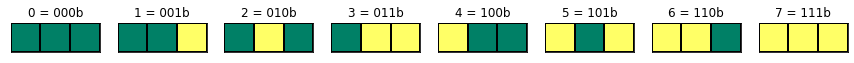

In [4]:
fig, axes = plt.subplots(1, 8, figsize=(15, 3), subplot_kw={"aspect": "equal"})
for i in range(8):
    p = axes[i].pcolormesh([[i & 4 >> j > 0 for j in range(3)]],
                           vmin=0, vmax=1, cmap='summer', edgecolors='black',lw=1)
    axes[i].set_title("{} = {:03b}b".format(i, i))
    p.axes.get_xaxis().set_visible(False)
    p.axes.get_yaxis().set_visible(False)
plt.show()

Each of these patterns is encoded in the rule number as a bit, resulting in eight bits. For example rule 30:

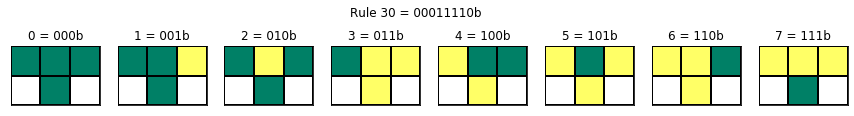

In [5]:
rule = 30
fig, axes = plt.subplots(1, 8, figsize=(15, 2), subplot_kw={"aspect": "equal"})
for i in range(8):
    p = axes[i].pcolormesh([[i & 4 >> j > 0 for j in range(3)], [np.nan, rule & 128 >> i, np.nan]],
                           vmin=0, vmax=1, cmap='summer', edgecolors='black', lw=1)
    axes[i].set_title("{} = {:03b}b".format(i, i))
    p.axes.get_xaxis().set_visible(False)
    p.axes.get_yaxis().set_visible(False)
    axes[i].invert_yaxis()
fig.suptitle("Rule {} = {:08b}b".format(rule, rule))
plt.show()

The propagator can be stated a bit cryptically.

In [6]:
def propagate(rule, x):
    state = (np.roll(x, 1) << 2) | (x << 1) | np.roll(x, -1)
    return rule & (1 << state) > 0

Next, we need to write a function that generates a plot of the CA's evolution given all of the input settings.

In [7]:
def f(settings):
    N = settings.size
    M = settings.generations
    universe = np.zeros(dtype=int, shape=[M, N])
    if settings.ic_type == IC.randomized:
        universe[0] = np.random.randint(0, 2, size=N)
    else:
        universe[0][N//2] = 1

    for i in range(1, M):
        universe[i] = propagate(settings.rule, universe[i-1])
    
    plt.figure(figsize=(12, 10))
    plt.imshow(universe, interpolation='kaiser', cmap='summer')
    plt.show()

Combining everything into a widget:

In [8]:
settings = Settings()

logo = open("figures/logo-rot.png", "rb").read()
plot = widgets.interactive_output(f, {"settings": settings})
plot.layout.height = '500px'

layout = widgets.AppLayout(
    header=widgets.Label("Elementary Cellular Automata", layout=widgets.Layout(flex="0 1 20pt")),
    left_sidebar=widgets.VBox(list(settings.widgets.values())),
    center=plot,
    right_sidebar=widgets.Image(value=logo, format='png', width="50px",
                                layout=widgets.Layout(margin="0pt 15pt",
                                                      object_fit="scale-down")),
    footer=widgets.Label("Brought to you by the Netherlands eScience Center."),
    pane_heights=[1,9,1])

layout

AppLayout(children=(Label(value='Elementary Cellular Automata', layout=Layout(flex='0 1 20pt', grid_area='head…